<a href="https://colab.research.google.com/github/MickaRiv/ProjetDatascientest-VoiceSeparator/blob/main/notebooks/models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install nussl et import systématiques

## Install de nussl

In [3]:
# à ne faire qu'une fois pour installer le paquet nussl
!pip install nussl

  Using cached nussl-1.1.9-py2.py3-none-any.whl (239 kB)
  Using cached pyloudnorm-0.1.0-py3-none-any.whl (9.3 kB)
  Using cached ffmpy-0.3.0.tar.gz (4.8 kB)
  Using cached jams-0.3.4.tar.gz (51 kB)
  Using cached museval-0.4.0-py2.py3-none-any.whl (21 kB)
  Using cached ffmpeg_python-0.2.0-py3-none-any.whl (25 kB)
  Using cached musdb-0.4.0-py2.py3-none-any.whl (29 kB)
  Using cached pytorch_ignite-0.4.7-py3-none-any.whl (240 kB)
  Using cached sox-1.4.1-py2.py3-none-any.whl (39 kB)
  Using cached soxbindings-1.2.3-cp37-cp37m-manylinux2010_x86_64.whl (3.3 MB)
  Using cached termtables-0.2.4-py3-none-any.whl (17 kB)
  Using cached gpytorch-1.5.1-py2.py3-none-any.whl (503 kB)
  Using cached zarr-2.10.3-py3-none-any.whl (146 kB)
  Using cached norbert-0.2.1-py2.py3-none-any.whl (11 kB)
  Using cached jsonschema-4.2.1-py3-none-any.whl (69 kB)
  Using cached mir_eval-0.6.tar.gz (87 kB)
  Using cached pyaml-21.10.1-py2.py3-none-any.whl (24 kB)
  Using cached stempeg-0.2.3-py3-none-any.whl (

## Imports

In [4]:
# Chargement des paquets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import librosa
import nussl
import numpy as np
import os,sys
import importlib # pour mise à jour des lib en développement


SoX could not be found!

    If you do not have SoX, proceed here:
     - - - http://sox.sourceforge.net/ - - -

    If you do (or think that you should) have SoX, double-check your
    path variables.
    


## Montage du drive et du working directory

Montage du drive

In [5]:
from google.colab import drive # import drive from google colab
drive.mount("/content/drive")  # we mount the google drive at /content/drive

Mounted at /content/drive


Si développements et besoin de lib locales qui sont dans src, on se déplace sur le clone de git pour développement

In [21]:
#%cd /content/drive/MyDrive/Projet Datascientest/cloned_git_Ephi/ProjetDatascientest-VoiceSeparator
#%ls
sys.path.append(os.path.join("/content",
                             "drive",
                             "MyDrive",
                             "Projet Datascientest",
                             "cloned_git_Ephi",
                             "ProjetDatascientest-VoiceSeparator"))
#os.chdir(os.path.join("drive","MyDrive","Projet Datascientest","cloned_git_Ephi","ProjetDatascientest-VoiceSeparator"))
%reload_ext autoreload
%autoreload 2

Alternativement, possibilité d'utiliser directement la version actuelle de la librairie sur GitHub

In [ ]:
!pip install git+https://github.com/MickaRiv/ProjetDatascientest-VoiceSeparator

In [ ]:
import voicesep

In [ ]:
# pour mettre à jour d'éventuelle modifs des modules
#importlib.reload(dataviz)
from voicesep.dataviz import test
test()

# Téléchargement des données


### Lecture du csv corrigé du drive

In [18]:
%pwd

'/content/drive/.shortcut-targets-by-id/1jB0u0zpR4h_lQKx54NiMAOt1_XxP5nSg/Projet Datascientest/cloned_git_Ephi/ProjetDatascientest-VoiceSeparator'

In [23]:
# Lecture du csv contenant le listing des musiques
liste_musdb18_new = os.path.join("/content","drive","MyDrive","Projet Datascientest","musdb18","liste_musdb18_new.csv")
df=pd.read_csv(liste_musdb18_new)

# création de 2 colonnes grâce aux 2 fonctions précédentes
# Dataset : train/test
# Duration : durée de la musique
%pwd
#importlib.reload(dataviz)
from voicesep.dataviz import train_or_test
df["Dataset"] = df["Track name"].apply(train_or_test)

display(df.head())

Unnamed: 0                      Track name  ...      License Dataset
0           0  A Classic Education - NightOwl  ...  CC BY-NC-SA   train
1           1         Actions - Devil's Words  ...   Restricted   train
2           2      Actions - One Minute Smile  ...   Restricted   train
3           3    Actions - South Of The Water  ...   Restricted   train
4           4           Aimee Norwich - Child  ...  CC BY-NC-SA   train

[5 rows x 6 columns]

## Téléchargement de la base musdb18

In [ ]:
# MUSDB18 est déjà dans le paquet nussl, 
# on s'appuie donc sur les fonctions de ce paquet

# création d'un paquet musdb avec 7s secondes de chaque musique de la base musdb18
# sera dans /root/.nussl/musdb18
from voicesep.core import get_musdb_data
musdb = get_musdb_data()

# We gather drum, bass and other automatically when downloading musdb18
musdb_tfm = get_musdb_data(gather_accompaniment=True)

Done!


##Sélection d'une musique i

In [ ]:
# écoute des titres pour en sélectionner quelques uns
display_audio_mix = True
display_audio_sources = True
i = 54


# La vraie séparation

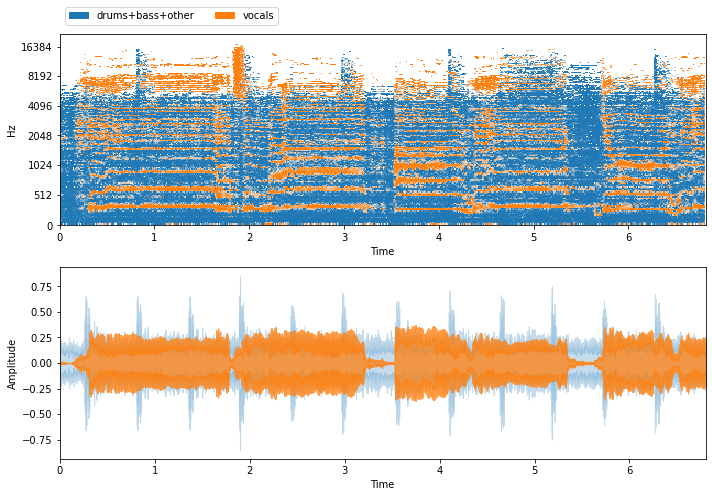


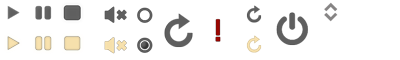
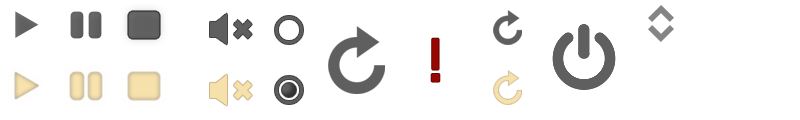
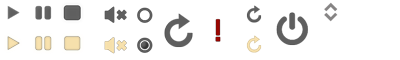

In [ ]:
item = musdb_tfm[i]
mix = item['mix']
sources = item['sources']
truth = [sources['drums+bass+other'], sources['vocals']]

#importlib.reload(dataviz)
from voicesep.dataviz import visualize_and_embed
visualize_and_embed(sources)

# Nos modèles

## Création des data/target train/test

Partie de Stany, à comprendre et adapter pour x/y train/test via un train_test_split ?

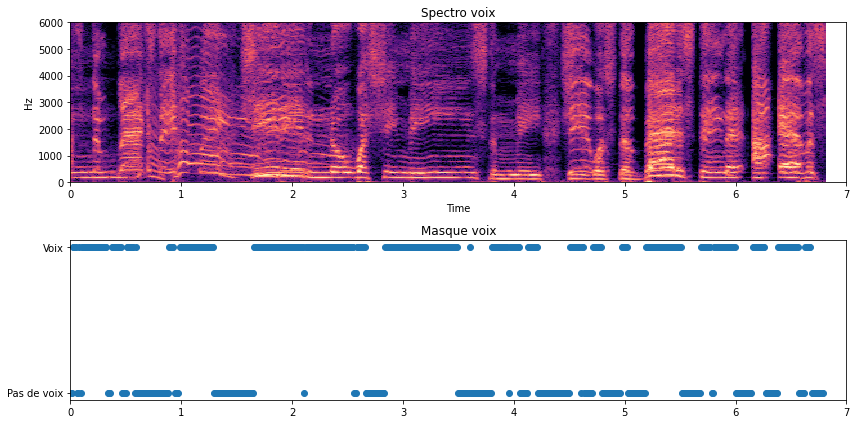

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log10


La musique  Angels In Amplifiers - I'm Alright  n'est pas dans la base train/test.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log10


Npiste (train/test) 55178 28763
Nhop= 587
Nfreq= 1025
Shape(train/test) (55178,) (28763,)


In [ ]:
# paramètres de la STFT
window_length=2048
hop_length=512

# coupure en db (par rapport au max)
db_cutoff = -15. 

# plot?
plot=True

# target 
y_train=np.array([])
y_test=np.array([])

for i in range(len(musdb)):
  voice=musdb[i]['sources']["vocals"]

  voice.stft_params = nussl.STFTParams(window_length=window_length, hop_length=hop_length)

  stft = voice.stft()

  # niveau puissance en db (en relatif par rapport max.)
  psd = 10*np.log10(voice.power_spectrogram_data/voice.power_spectrogram_data.max())

  # je moyenne sur canaux et on chope le max dans toute la gamme fréquentielle
  psdmax = np.max( (psd[:,:,0]+psd[:,:,1])/2., axis=0)

  # puis masque basé sur cette valeur
  tmask = np.where(psdmax  < db_cutoff, 0., 1.)
  
  # temps morceau et taille dt (nhop) de la stft
  t = voice.audio_data.shape[1]/voice.sample_rate 
  nhop = tmask.shape[0]
  dt = t/nhop
  t = dt*np.arange(nhop) 

  # nfreq est le nombre de fréquences de la stft
  nfreq0 = psd.shape[0]

# on trace... 0= pas de voix
  if (plot) and i==54 :
    AudioDisplay(Audio(data=musdb[i]['sources']["vocals"].audio_data, rate=musdb[i]['sources']["vocals"].sample_rate)) 
    plt.figure(figsize=(12,6))
    plt.subplot(211)
    nussl.core.utils.visualize_spectrogram(voice,y_axis='linear')
    plt.title('Spectro voix')
    plt.ylim(0,6000)
    plt.xlim(0,7)
    plt.subplot(212)
    plt.title('Masque voix')
    plt.scatter(t,y=tmask)
    plt.xlim(0,7)
    plt.yticks([0,1],['Pas de voix', 'Voix'])
    plt.tight_layout()
    plt.show()

  # Prendre en compte le dossier train/test qu'on nous a fourni
  # on stocke à la suite toutes ces valeurs
  if mus[i].name in df["Track name"].to_list():
    if df[df["Track name"]==mus[i].name].iloc[0,df.columns.get_loc('Dataset')]=="train":
      y_train=np.append(y_train,tmask)  
    elif df[df["Track name"]==mus[i].name].iloc[0,df.columns.get_loc('Dataset')]=="test":
     y_test=np.append(y_test,tmask)
  else:
    print("La musique ",mus[i].name," n'est pas dans la base train/test.")


# ca y est
print('Npiste (train/test)',len(y_train),len(y_test))
print('Nhop=',nhop)
print('Nfreq=',nfreq0)
print('Shape(train/test)',y_train.shape,y_test.shape)